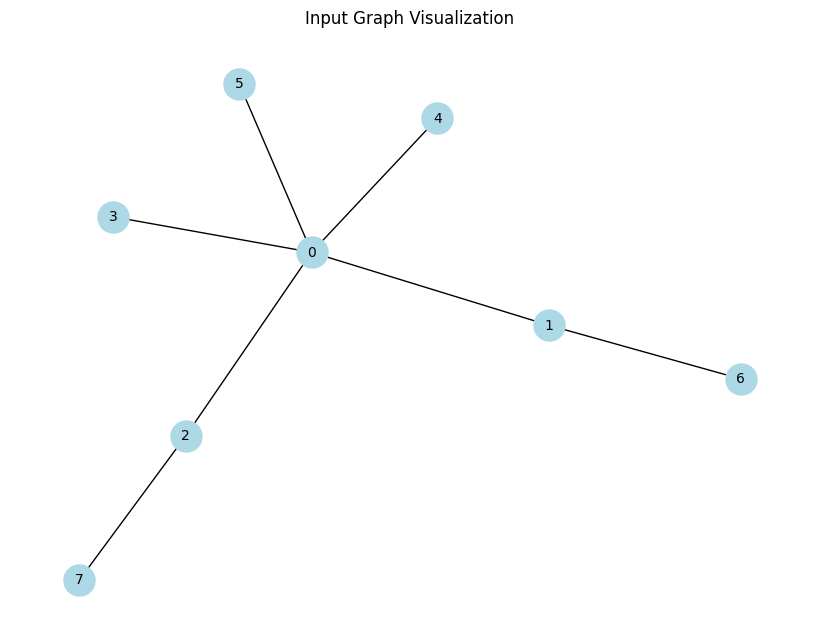

Epoch 1/100, Train Loss: 1.0485
Epoch 2/100, Train Loss: 129247.2188
Epoch 3/100, Train Loss: 1.0111
Epoch 4/100, Train Loss: 1.2217
Epoch 5/100, Train Loss: 1.1745
Epoch 6/100, Train Loss: 1.1202
Epoch 7/100, Train Loss: 1.1921
Epoch 8/100, Train Loss: 1.2269
Epoch 9/100, Train Loss: 1.2458
Epoch 10/100, Train Loss: 1.2078
Epoch 11/100, Train Loss: 1.2403
Epoch 12/100, Train Loss: 1.1372
Epoch 13/100, Train Loss: 1.0527
Epoch 14/100, Train Loss: 1.0014
Epoch 15/100, Train Loss: 1.1134
Epoch 16/100, Train Loss: 1.0316
Epoch 17/100, Train Loss: 1.0005
Epoch 18/100, Train Loss: 1.0179
Epoch 19/100, Train Loss: 1.0306
Epoch 20/100, Train Loss: 1.0282
Epoch 21/100, Train Loss: 1.0145
Epoch 22/100, Train Loss: 1.0018
Epoch 23/100, Train Loss: 1.0036
Epoch 24/100, Train Loss: 1.0173
Epoch 25/100, Train Loss: 1.0202
Epoch 26/100, Train Loss: 1.0094
Epoch 27/100, Train Loss: 1.0011
Epoch 28/100, Train Loss: 1.0027
Epoch 29/100, Train Loss: 1.0074
Epoch 30/100, Train Loss: 1.0099
Epoch 31/100, 

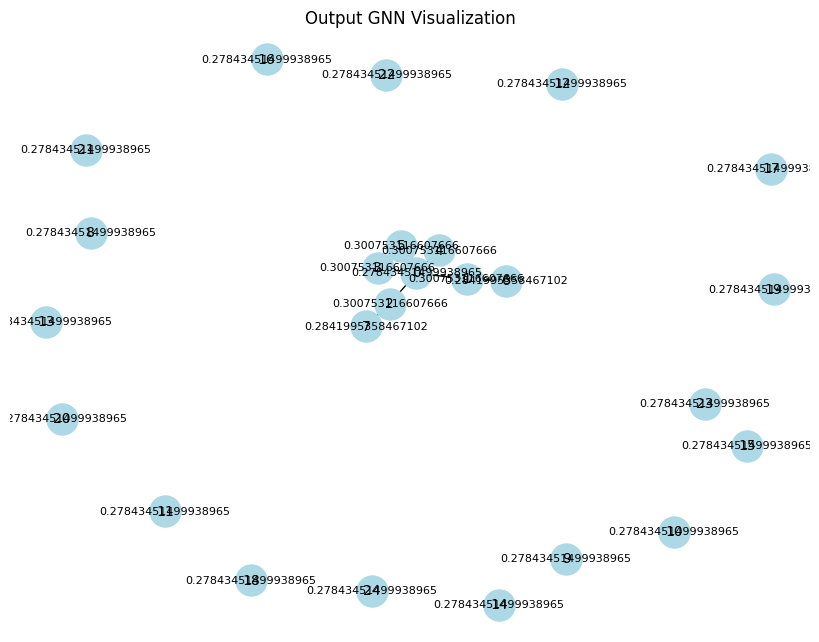

<Figure size 640x480 with 0 Axes>

In [4]:
import torch
import pandas as pd
import torch.nn as nn
import torch.optim as optim
import torch_geometric.data as Data
from torch_geometric.nn import GCNConv
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

adj_matrix = np.array([[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# Step 2: Convert the adjacency matrix to edge indices
edge_index = torch.tensor(np.transpose(np.nonzero(adj_matrix)), dtype=torch.long).t().contiguous()

# Step 3: Create a Data object from the edge indices
x = torch.tensor(adj_matrix.sum(axis=1), dtype=torch.float).view(-1, 1)  # Dummy node features
data = Data.Data(x=x, edge_index=edge_index)

graph = nx.Graph()
graph.add_edges_from(edge_index.t().tolist())


# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph, seed=42)
nx.draw(graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title('Input Graph Visualization')
plt.show()

# Step 4: Define the graph autoencoder model
input_dim = 1  # Single scalar value for each node
hidden_dim = 64
latent_dim = 32
num_layers = 4
learning_rate = 0.1
num_epochs = 100

class GraphAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim, num_layers, learning_rate):
        super(GraphAutoencoder, self).__init__()
        self.num_layers = num_layers

        self.layers = nn.ModuleList()
        self.layers.append(GCNConv(input_dim, hidden_dim))
        for _ in range(num_layers - 1):
            self.layers.append(GCNConv(hidden_dim, hidden_dim))
        self.layers.append(GCNConv(hidden_dim, latent_dim))

        self.fc_hidden = nn.Linear(latent_dim, hidden_dim)
        self.fc_output = nn.Linear(hidden_dim, input_dim)

        self.learning_rate = learning_rate

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        for layer in self.layers:
            x = layer(x, edge_index)
            x = torch.relu(x)

        x = self.fc_hidden(x)
        x = torch.relu(x)
        optimized_features = self.fc_output(x)
        return optimized_features

# Step 5: Train the graph autoencoder
model = GraphAutoencoder(input_dim, hidden_dim, latent_dim, num_layers, learning_rate)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

train_losses = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    optimized_features = model(data)
    loss = criterion(optimized_features, data.x)
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    print(f"Epoch {epoch + 1}/{num_epochs}, Train Loss: {loss.item():.4f}")

# Step 6: Create an output graph from the optimized features and edge indices
output_graph = nx.Graph()

# Add nodes with optimized features
for node_idx, features in enumerate(optimized_features):
    output_graph.add_node(node_idx, features=features.item())

# Add edges
edges = edge_index.t().tolist()
output_graph.add_edges_from(edges)

# Step 7: Visualize the output graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(output_graph, seed=42)
nx.draw(output_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)

# Add node features as labels
node_labels = nx.get_node_attributes(output_graph, 'features')
nx.draw_networkx_labels(output_graph, pos, node_labels, font_size=8, font_color='black')

plt.title('Output GNN Visualization')
plt.show()

# Save the output graph as an image
plt.savefig('output_graph.png')

# Save the losses to an Excel file
data = {'Epoch': range(1, num_epochs + 1), 'Train Loss': train_losses}
df = pd.DataFrame(data)
df.to_excel('losses.xlsx', index=False)


In [5]:
import cv2
import graphviz

# Load and process the PNG image
image = cv2.imread('g1.png', cv2.IMREAD_GRAYSCALE)  # Convert to grayscale if necessary

# Preprocessing
image = cv2.GaussianBlur(image, (3, 3), 0)  # Apply Gaussian blur to reduce noise
_, threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)  # Apply Otsu's thresholding

# Morphological Operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
threshold = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)  # Closing operation to connect broken lines
threshold = cv2.morphologyEx(threshold, cv2.MORPH_OPEN, kernel)  # Opening( erosion followed by dilation) operation to remove small artifacts

# Contour Detection
contours, _ = cv2.findContours(threshold, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Filter contours based on size, shape, or other criteria if needed

# Create a DOT graph object
dot_graph = graphviz.Digraph()

# Add nodes and edges to the DOT graph
dot_graph.node('A')
dot_graph.node('B')
dot_graph.node('C')
dot_graph.node('D')
dot_graph.node('E')
dot_graph.edge('A', 'B')
dot_graph.edge('B', 'C')
dot_graph.edge('B', 'D')
dot_graph.edge('C', 'E')
dot_graph.edge('D', 'E')

    # Process each contour and extract relevant information (e.g., centroid, bounding box)
    # Add nodes and edges to the DOT graph based on the contour information using dot_graph.node() and dot_graph.edge() methods

# Save the DOT file
dot_graph.render('output_graph.dot', view=True)


'output_graph.dot.pdf'

C:\Python311\Lib\site-packages\dgl\heterograph.py:92: DGLWarning: Recommend creating graphs by `dgl.graph(data)` instead of `dgl.DGLGraph(data)`.
  dgl_warning(


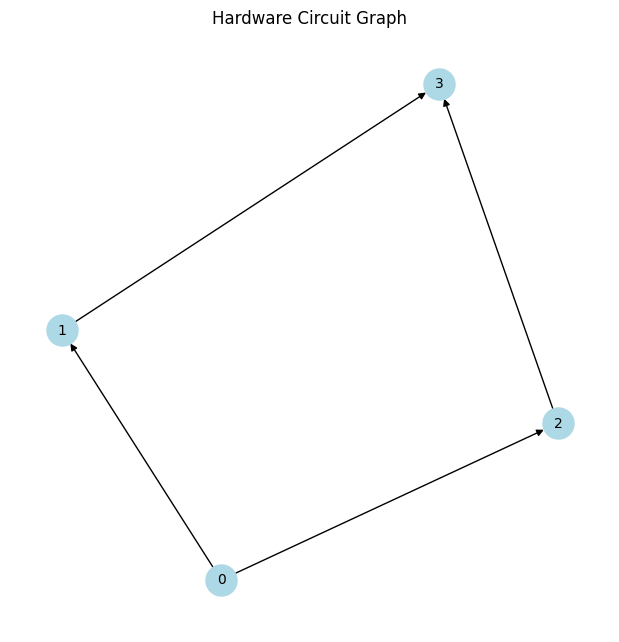

DGLError: There are 0-in-degree nodes in the graph, output for those nodes will be invalid. This is harmful for some applications, causing silent performance regression. Adding self-loop on the input graph by calling `g = dgl.add_self_loop(g)` will resolve the issue. Setting ``allow_zero_in_degree`` to be `True` when constructing this module will suppress the check and let the code run.

In [4]:
import dgl
import torch
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn.pytorch import GATConv

# Define a simple GNN model
class CircuitGNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(CircuitGNN, self).__init__()
        self.gnn_layer = GATConv(input_dim, hidden_dim, num_heads=1)
        self.fc_layer = nn.Linear(hidden_dim, output_dim)

    def forward(self, g, features):
        x = F.relu(self.gnn_layer(g, features))
        x = self.fc_layer(x)
        return x

# Create a sample hardware circuit graph
g = dgl.DGLGraph()
g.add_nodes(4)
g.add_edges([0, 0, 1, 2], [1, 2, 3, 3])  # Specify the edges

# Convert the DGL graph to a NetworkX graph
nx_graph = g.to_networkx()

# Draw the graph
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
pos = nx.spring_layout(nx_graph)
nx.draw(nx_graph, pos, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title("Hardware Circuit Graph")
plt.show()

# Define node features for the circuit components
features = torch.tensor([[1., 0., 0.],   # Node 0 features
                         [0., 1., 0.],   # Node 1 features
                         [0., 0., 1.],   # Node 2 features
                         [1., 1., 0.]])  # Node 3 features

# Define ground truth labels for a specific circuit analysis task
labels = torch.tensor([[1.],   # Label for Node 0
                       [0.],   # Label for Node 1
                       [0.],   # Label for Node 2
                       [1.]])  # Label for Node 3

# Create and initialize the GNN model
gnn_model = CircuitGNN(input_dim=3, hidden_dim=16, output_dim=1)
optimizer = torch.optim.Adam(gnn_model.parameters(), lr=0.01)

# Training loop
for epoch in range(100):
    gnn_model.train()
    logits = gnn_model(g, features)
    loss = F.binary_cross_entropy_with_logits(logits, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Make predictions on the circuit
gnn_model.eval()
with torch.no_grad():
    logits = gnn_model(g, features)
    predictions = torch.sigmoid(logits)

print("Node Predictions:")
print(predictions)
